In [2]:
from qiskit import *

from qiskit.visualization import plot_histogram

q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(q,c)

circuit.h(0)

circuit.cx(0,1)

circuit.measure(q,c)

print(circuit)



     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


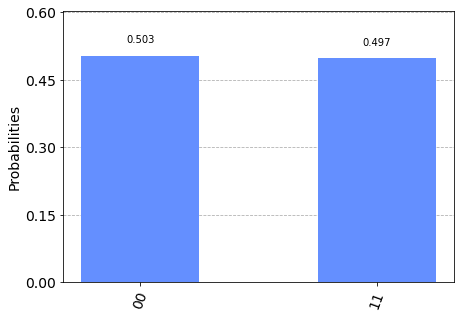

In [3]:
simulator = Aer.get_backend('qasm_simulator')

results = execute(circuit,simulator).result().get_counts()

plot_histogram(results)



In [ ]:

IBMQ.save_account('APIKEY', overwrite=True)
IBMQ.load_account()

provider = IBMQ.get_provider(hub = 'ibm-q')

device = provider.get_backend('ibmq_16_melbourne')

job = execute(circuit,backend = device,shots = 1024)

device_result = job.result()

plot_histogram(device_result.get_counts(circuit))

#print(job.job_id())